In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]
print(x, y)

In [17]:
print(x.shape)

torch.Size([1, 28, 28])


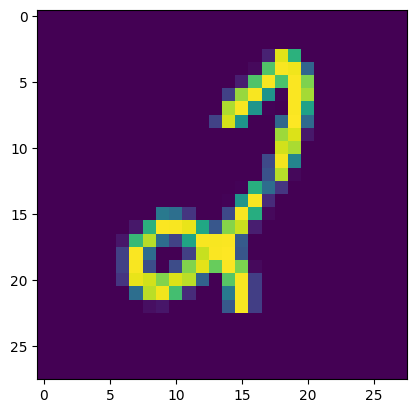

In [18]:
import matplotlib.pyplot as plt

plt.imshow(x.view(28, 28))

In [22]:
from collections import defaultdict

counts = defaultdict(int)
total = 0
for data in trainset:
    for y in data[1]:
        counts[int(y)] += 1
        total += 1


for num, freq in counts.items():
    print(f'{num}: {(freq/total)*100}')


0: 9.871666666666666
8: 9.751666666666667
7: 10.441666666666666
4: 9.736666666666666
5: 9.035
1: 11.236666666666666
3: 10.218333333333334
2: 9.93
9: 9.915000000000001
6: 9.863333333333333


In [24]:
import torch.nn as nn 
import torch.nn.functional as F 

In [26]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    

net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


tensor([[-2.2382, -2.2547, -2.3884, -2.2727, -2.2872, -2.2781, -2.4260, -2.2961,
         -2.3857, -2.2206]], grad_fn=<LogSoftmaxBackward0>)


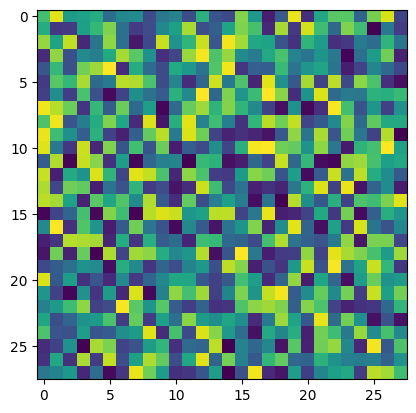

In [31]:
X = torch.rand(28, 28)
plt.imshow(X)

output = net(X.view(-1, 28*28))

In [34]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data 
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0970, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)


In [37]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print('Accuracy:', round(correct/total, 3))

Accuracy: 0.975


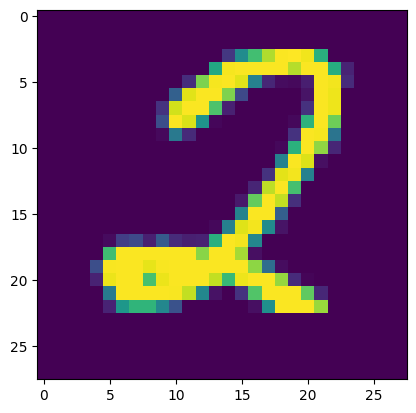

2
tensor(2)


In [42]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28, 28))
plt.show()
print(int(y[0]))

print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

In [36]:
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print('Accuracy - Test:', round(correct/total, 3))

Accuracy - Test: 0.966
